<a href="https://colab.research.google.com/github/Lexian-6/Pytorch-Tutorial/blob/main/01_Code_along_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test)

10

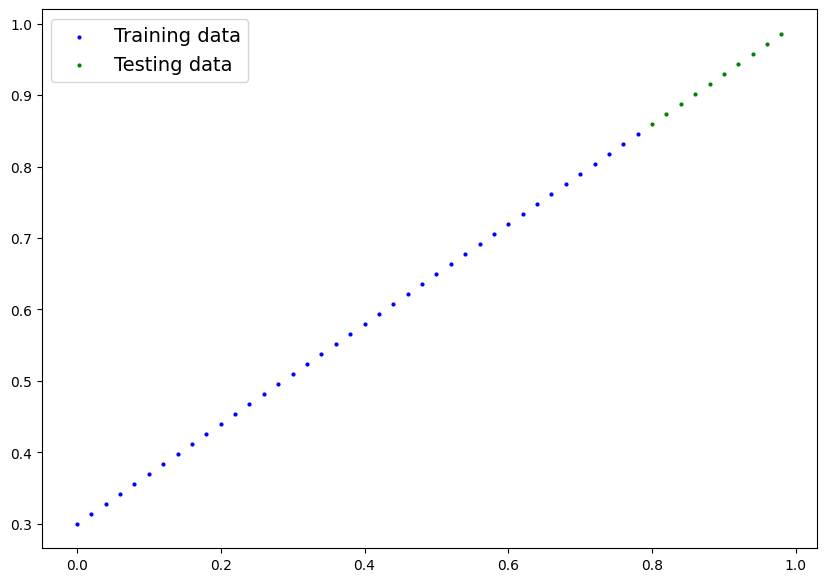

In [ ]:
def plot_predictions(train_data=X_train,
            train_labels=y_train,
            test_data=X_test,
            test_labels=y_test,
            predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_predictions()


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

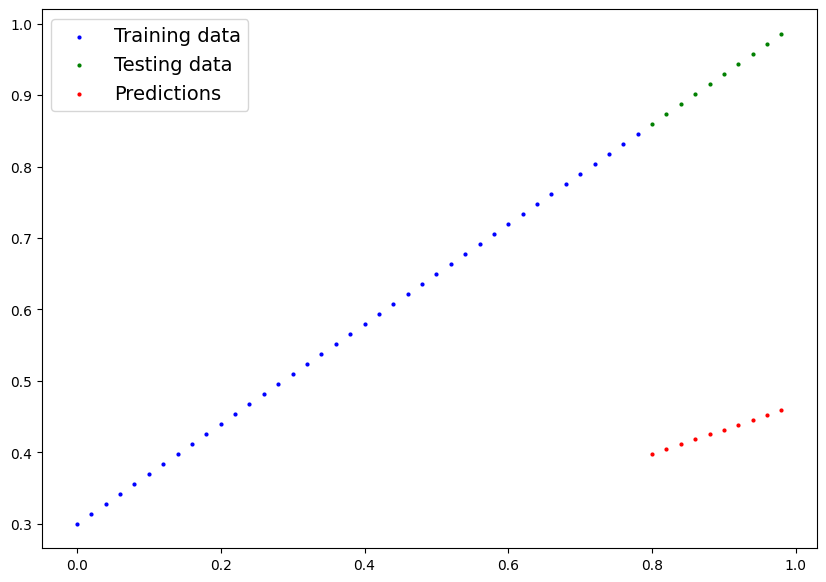

In [ ]:
with torch.inference_mode():  # Turn off grad things, make prediction faster.
# with torch.no_grad():
  y_pred = model_0(X_test)
plot_predictions(predictions=y_pred)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
              lr=0.01)

In [ ]:
epochs = 300
epoch_count = []
train_loss = []
test_loss = []

step = 0
count = 0
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    y_t_pred = model_0(X_test)
    t_loss = loss_fn(y_t_pred, y_test)
    if epoch % 10 == 0:
      train_loss.append(loss.numpy())
      epoch_count.append(epoch)
      test_loss.append(t_loss.numpy())




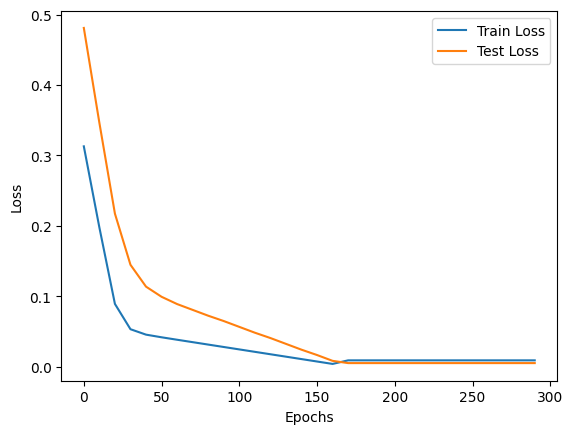

In [ ]:
plt.plot(epoch_count, train_loss, label = "Train Loss")
plt.plot(epoch_count, test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_0_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_0_PATH)

In [ ]:
!ls -l "models/01_pytorch_workflow_model_0.pth"

-rw-r--r-- 1 root root 1680 May 23 20:36 models/01_pytorch_workflow_model_0.pth


In [ ]:
model_file = "models/01_pytorch_workflow_model_0.pth"
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=model_file))

model_0.eval()
loaded_model.eval()
with torch.inference_mode():
  new_pred_y = loaded_model(X_test)
  pred_y = model_0(X_test)
pred_y

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

# Putting all together with nn linear layer instead of hardcoding linear function

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn

torch.__version__

'2.3.0+cu121'

In [ ]:
# Device Diagnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
# Create Data
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02)
X = X.unsqueeze(dim=1)

y = weight * X + bias
print(X[:10], y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
train_split = int(0.8*len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

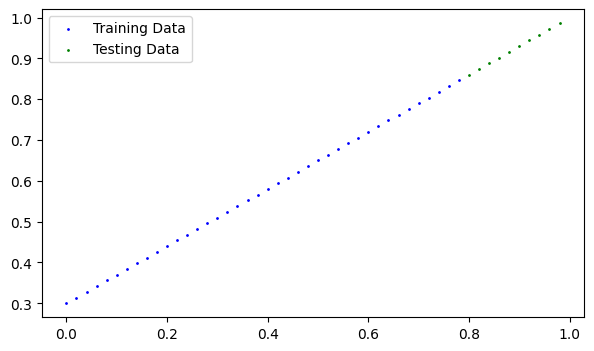

In [ ]:
def plot_predictions(train_data=X_train.cpu(), train_label=y_train.cpu(),
            test_data=X_test.cpu(), test_label=y_test.cpu(), predictions=None):
  plt.figure(figsize=(7, 4))
  plt.scatter(x=train_data, y=train_label, c="b", s=1, label="Training Data")
  plt.scatter(x=test_data, y=test_label, c="g", s=1, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.title("")
  plt.legend()
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearlayer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.linearlayer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()


OrderedDict([('linearlayer.weight', tensor([[0.7645]])),
             ('linearlayer.bias', tensor([0.8300]))])

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)

LinearRegressionModel(
  (linearlayer): Linear(in_features=1, out_features=1, bias=True)
)

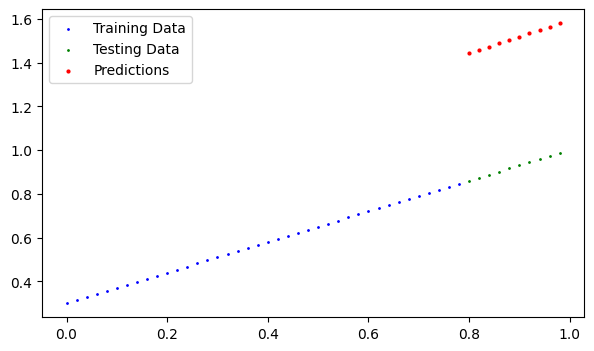

In [ ]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
y_pred = model_1(X_test)
plot_predictions(predictions=y_pred.cpu().detach().numpy())

In [ ]:
model_1.train()
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs=1000
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval
  with torch.inference_mode():
    t_pred = model_1(X_test)
    t_loss = loss_fn(t_pred, y_test)
    if epoch % 100 == 0:
      print(f"With {epoch}th epochs, train loss is {loss} | test loss is {t_loss}")


With 0th epochs, train loss is 0.5551779866218567 | test loss is 0.5739762187004089
With 100th epochs, train loss is 0.006215683650225401 | test loss is 0.014086711220443249
With 200th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 300th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 400th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 500th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 600th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 700th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 800th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882
With 900th epochs, train loss is 0.0012645035749301314 | test loss is 0.013801801018416882


In [ ]:
model_1.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linearlayer.bias', tensor([0.3025], device='cuda:0'))])

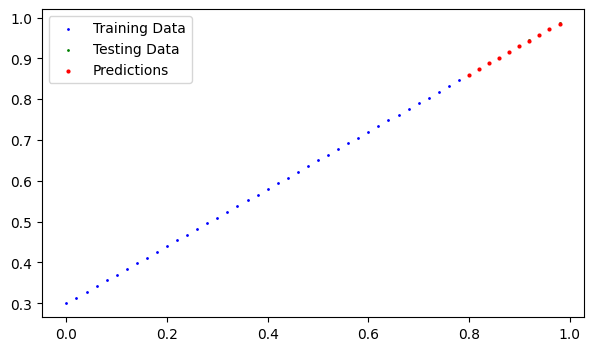

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_pred = model_1(X_test)
plot_predictions(predictions=y_pred.cpu())

In [ ]:
from pathlib import Path
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
loaded_model_1 = LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)
with torch.inference_mode():
  new_pred = loaded_model_1(X_test)
new_pred==y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')